In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
import seaborn as sns

In [3]:
%matplotlib notebook

In [6]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'San Francisco', 'Los Angeles']}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Set the 'Name' column as the index
df.set_index('Name', inplace=True)

# Display the DataFrame with 'Name' as the index
print("\nDataFrame with 'Name' as the index:")
print(df)

Original DataFrame:
      Name  Age           City
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   35    Los Angeles

DataFrame with 'Name' as the index:
         Age           City
Name                       
Alice     25       New York
Bob       30  San Francisco
Charlie   35    Los Angeles


In [13]:
Main_directory = 'C:/Users/Iwan/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets'
All_stars_directory = f'{Main_directory}/All Stars Data.csv'
All_planets_directory = f'{Main_directory}/All Planets Data.csv'

All_stars_data = pd.read_csv(All_stars_directory)
All_stars_data.set_index('designation', inplace=True)
print(All_stars_data)
All_planets_data = pd.read_csv(All_planets_directory)

def Data_check(Data, headers=False):
    headers = Data.columns if type(headers) is bool else headers 
    bool_array = [pd.notna(Data[col_name]) for col_name in headers]
    check = np.flipud(np.rot90(bool_array))
    return check

def Find_least_error(Data, Checked_data, headers, error_headers, pm_seperation=True):
    least_error_array = []
    for row, boolean in enumerate(Checked_data):
        previous_error = np.inf
        for dataset, error_header in enumerate(error_headers):
            if sum(boolean) == 0:
                lowest_error = False
                break
            if boolean[dataset]:
                if pm_seperation:
                    current_error = Data[error_header[0]][row] + Data[error_header[1]][row]
                else:
                    current_error = 2*Data[error_header][row]
                if current_error < previous_error:
                    previous_error = current_error
                    lowest_error = headers[dataset]
        least_error_array.append(lowest_error)
    return least_error_array

def Ensure_all(All_variables):
    total_info = []
    num_stars = len(All_variables[0])
    for star_index in range(num_stars):
        object_info = [star_index]
        eliminate = False
        for variable_source in All_variables:
            eliminate = type(variable_source[star_index]) is bool
            if eliminate:
                break
            object_info.append(variable_source[star_index])
        if eliminate:
            continue
        total_info.append(object_info)
    return total_info

def Get_filtered_arrays(Data, Filtered_headers):
    Total_data = []
    for row in Filtered_headers:
        row_data = []
        for index in range(1, len(row)):
            row_data.append(Data[row[index]][row[0]])
        Total_data.append(row_data)
    return np.array(Total_data)

                              Teff (Gaia)  Teff pe (Gaia)  Teff me (Gaia)  \
designation                                                                 
Gaia DR3 1044013542142711296    3601.7380          4.2100          6.0947   
Gaia DR3 1053809778428567680          NaN             NaN             NaN   
Gaia DR3 1074139748425931008    5364.1390         12.0964         19.2386   
Gaia DR3 1076970406751899008    6437.1470          1.2436          1.0532   
Gaia DR3 1111639314047794944    6056.1055          3.2221          1.5059   
...                                   ...             ...             ...   
Gaia DR3 869913435026514688     4649.1714          1.1411          1.8858   
Gaia DR3 876608292608416512     5753.6000         16.2267         14.0640   
Gaia DR3 898130030131443584     6146.1420         12.4630          7.3207   
Gaia DR3 920308932010648448     5378.1010          9.5510          9.3420   
Gaia DR3 990291507088739072     6220.6177         16.5058         13.5191   

In [4]:
Teff_headers = ['Teff (Gaia)', 'Teff (Exo)', 'Teff (Fulton)', 'Teff (Van Eylen)']
Rad_headers = ['Radius (Gaia)', 'Radius (Fulton)', 'Radius (Van Eylen)']

Teff_check = Data_check(All_stars_data, Teff_headers)
Rad_check = Data_check(All_stars_data, Rad_headers)

Teff_error_headers = [['Teff pe (Gaia)', 'Teff me (Gaia)'], 
                      ['Teff pe (Exo)', 'Teff me (Exo)'], 
                      ['Teff pe (Fulton)', 'Teff me (Fulton)'],
                      ['Teff pe (Van Eylen)', 'Teff me (Van Eylen)']]

Rad_error_headers = [['Rad pe (Gaia)', 'Rad me (Gaia)'],
                     ['Rad pe (Fulton)', 'Rad me (Fulton)'],
                     ['Rad pe (Van Eylen)', 'Rad me (Van Eylen)']]
            
Best_teff_sources = Find_least_error(All_stars_data, Teff_check, Teff_headers, Teff_error_headers)
Best_rad_sources = Find_least_error(All_stars_data, Rad_check, Rad_headers, Rad_error_headers)

All_info = [Best_teff_sources, Best_rad_sources]
Filtered_headers = Ensure_all(All_info)

<IPython.core.display.Javascript object>


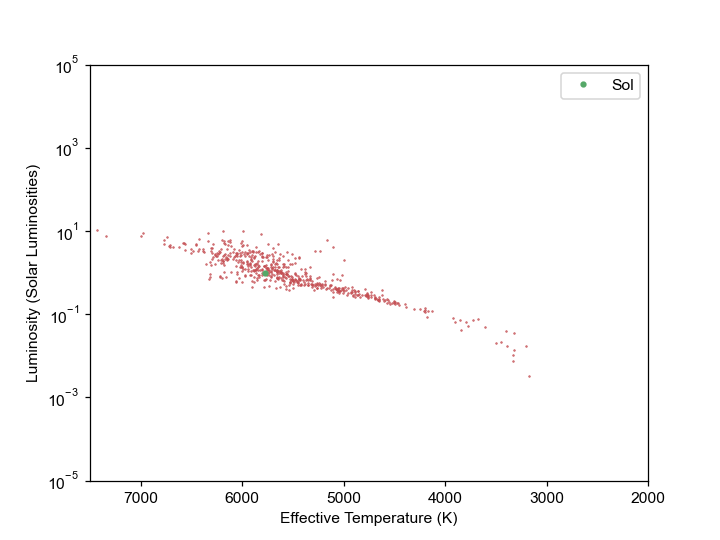

<IPython.core.display.Javascript object>


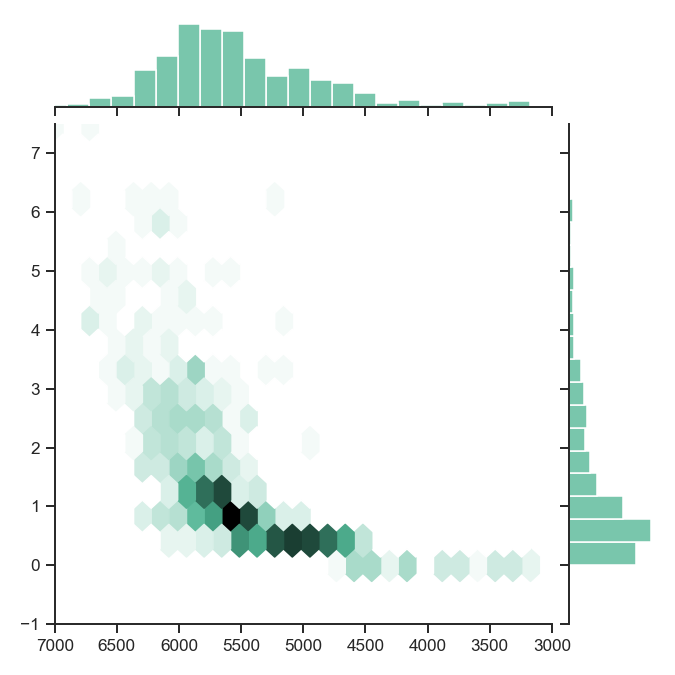

In [5]:
Array = Get_filtered_arrays(All_stars_data, Filtered_headers)
Teff = Array[:,0]
Rad = Array[:,1]
Luminosity = Rad**2*(Teff/5772)**4

plt.figure()
plt.plot(Teff, Luminosity, 'r.', markersize=1)
plt.plot(5772, 1, 'g.', label='Sol')
plt.ylabel('Luminosity (Solar Luminosities)')
plt.xlabel('Effective Temperature (K)')
plt.xlim(2000, 7500)
plt.ylim(0.00001, 100000)
plt.yscale('log')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

sns.set_theme(style="ticks")

sns.jointplot(x=Teff, y=Luminosity, xlim=(7000, 3000), ylim=(-1, 7.5), kind="hex", color="#4CB391")

In [6]:
PSR_headers = ['PSR (VanHo)', 'PSR (Fulton)', 'PSR (Van Eylen)']
PSR_check = Data_check(All_planets_data, PSR_headers)

print(All_planets_data['Host Gaia ID'])
Planet_data = []
for P_index, IDp in enumerate(All_planets_data['Host Gaia ID']):
    for S_index, IDs in enumerate(All_stars_data['designation']):
        print([IDp, IDs])
        if IDp == IDs:
            P_radius = All_planets_data['PSR (VanHo)'][P_index]*All_stars_data['Radius (Gaia)'][S_index]
            P_period = All_planets_data['P (VanHo)'][P_index]
            Planet_data.append([P_radius, P_period])
            
print(Planet_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

